In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tdq_raw = pd.read_csv("/Users/gritv/Desktop/projects /data/tdq_raw.csv")
tdq_clean = pd.read_csv("/Users/gritv/Desktop/projects /data/tdq_clean.csv")

tdq_raw["mode"] = "Before Cleaning"
tdq_clean["mode"] = "After Cleaning"

tdq_all = pd.concat([tdq_raw, tdq_clean], ignore_index=True)

tdq_raw, tdq_clean


(              table  missing_columns  extra_columns  dtype_mismatch  \
 0    visitor_events                0              0               0   
 1      applications                0              0               2   
 2          accounts                0              0               1   
 3      transactions                0              0               0   
 4  marketing_source                0              0               0   
 
    null_issues  duplicate_rows  missing_timestamps  time_gaps             mode  
 0            1            5890             10182.0       10.0  Before Cleaning  
 1            1             359                 0.0       90.0  Before Cleaning  
 2            0             145                 0.0      118.0  Before Cleaning  
 3            1            2720              5880.0       28.0  Before Cleaning  
 4            0               0                 NaN        NaN  Before Cleaning  ,
               table  missing_columns  extra_columns  dtype_mismatch  \
 

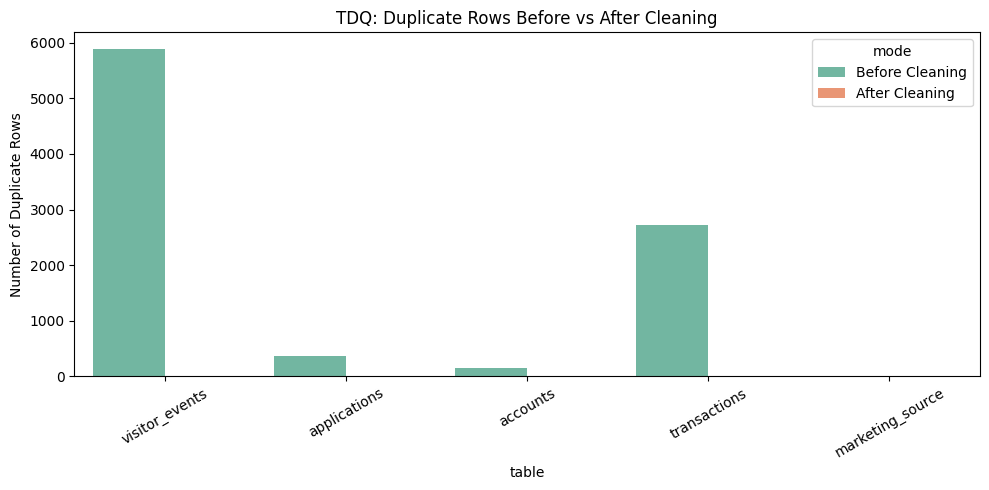

In [2]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=tdq_all,
    x="table",
    y="duplicate_rows",
    hue="mode",
    palette="Set2"
)

plt.title("TDQ: Duplicate Rows Before vs After Cleaning")
plt.ylabel("Number of Duplicate Rows")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/var/folders/_s/p988zzpj033g3ff1h9gdc8qh0000gn/T/ipykernel_63929/2829823617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


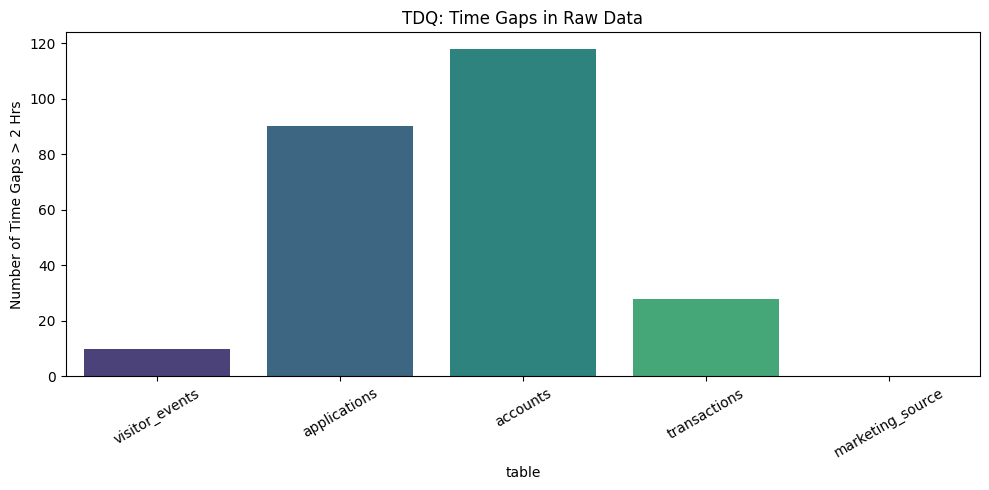

In [3]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=tdq_raw,
    x="table",
    y="time_gaps",
    palette="viridis"
)

plt.title("TDQ: Time Gaps in Raw Data")
plt.ylabel("Number of Time Gaps > 2 Hrs")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


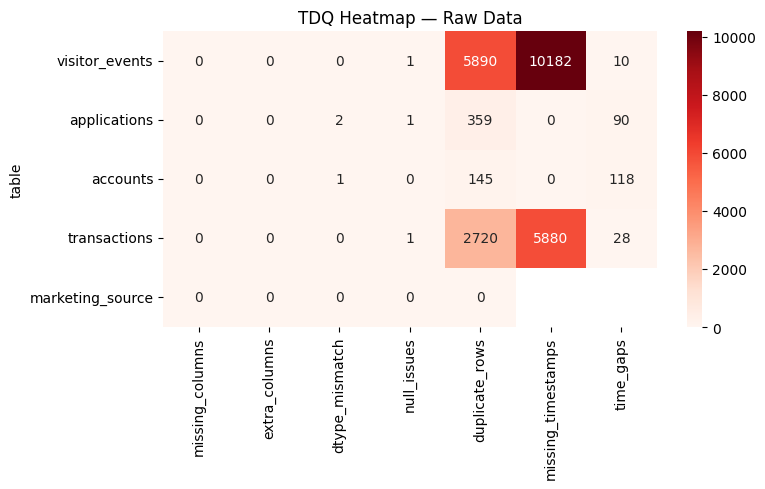

In [4]:
tdq_raw_heat = tdq_raw.set_index("table").drop(columns=["mode"])

plt.figure(figsize=(8,5))
sns.heatmap(tdq_raw_heat, annot=True, cmap="Reds", fmt="g")
plt.title("TDQ Heatmap — Raw Data")
plt.tight_layout()
plt.show()

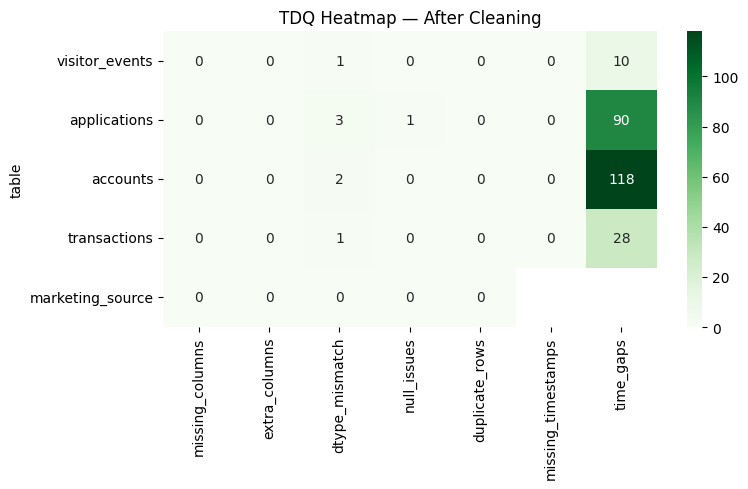

In [5]:
tdq_clean_heat = tdq_clean.set_index("table").drop(columns=["mode"])

plt.figure(figsize=(8,5))
sns.heatmap(tdq_clean_heat, annot=True, cmap="Greens", fmt="g")
plt.title("TDQ Heatmap — After Cleaning")
plt.tight_layout()
plt.show()

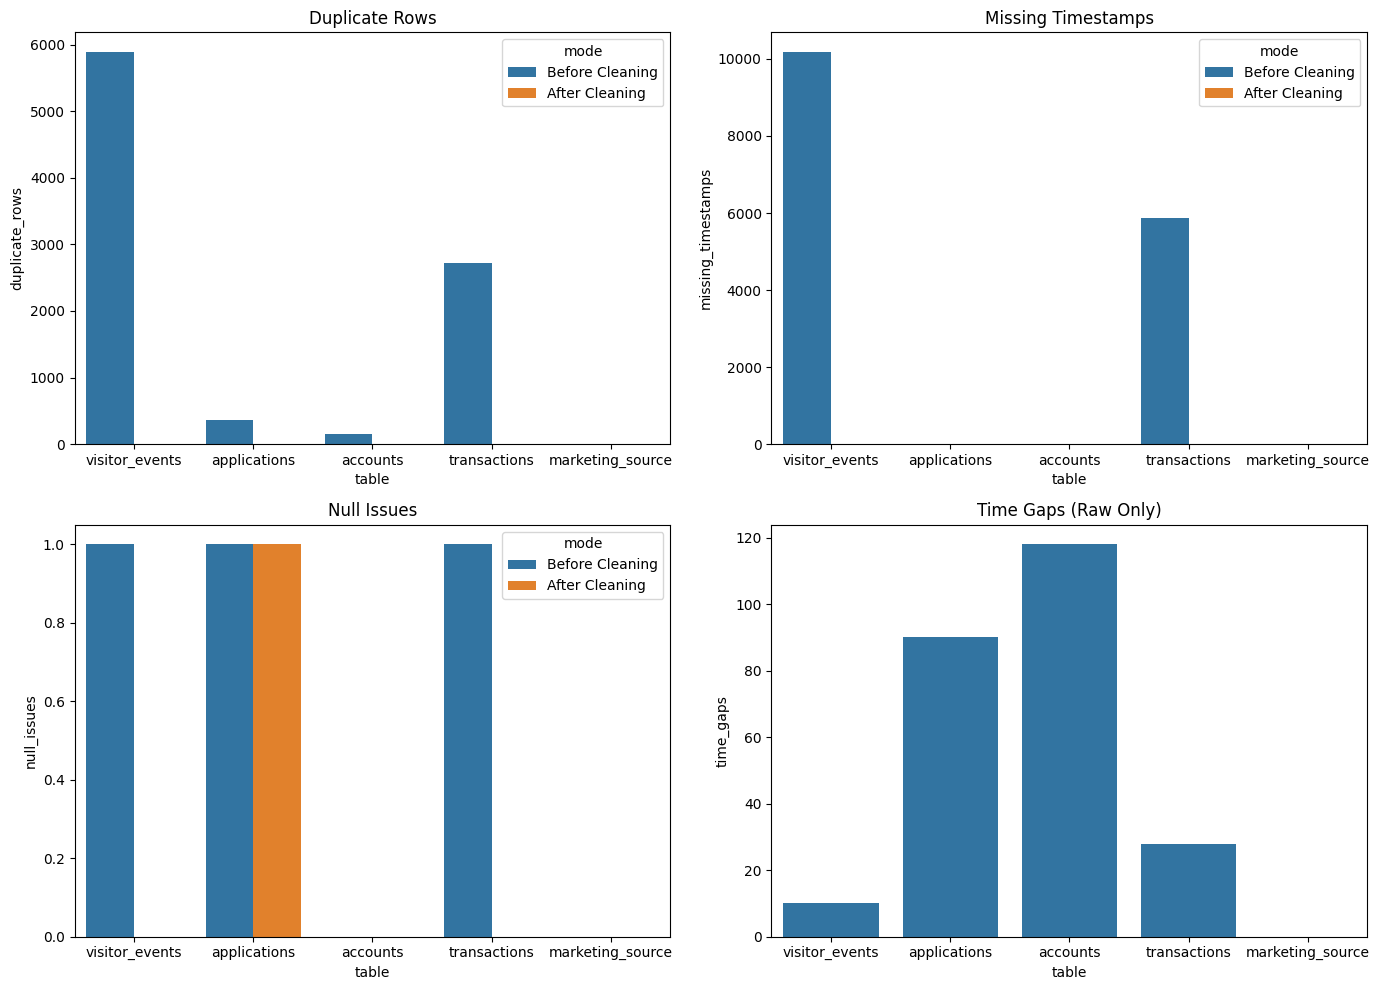

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(
    data=tdq_all,
    x="table",
    y="duplicate_rows",
    hue="mode",
    ax=axes[0,0]
)
axes[0,0].set_title("Duplicate Rows")

sns.barplot(
    data=tdq_all,
    x="table",
    y="missing_timestamps",
    hue="mode",
    ax=axes[0,1]
)
axes[0,1].set_title("Missing Timestamps")

sns.barplot(
    data=tdq_all,
    x="table",
    y="null_issues",
    hue="mode",
    ax=axes[1,0]
)
axes[1,0].set_title("Null Issues")

sns.barplot(
    data=tdq_raw,
    x="table",
    y="time_gaps",
    ax=axes[1,1]
)
axes[1,1].set_title("Time Gaps (Raw Only)")

plt.tight_layout()
plt.show()
